In [1]:
import pickle
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
data_path = "/data2/camilacl/git/amazon-storms-aerosols/data/aerosol/"
smps = xr.open_mfdataset(data_path + "aossmps/*.nc", combine='nested', concat_dim="time")
smps["time"] = smps.time - np.timedelta64(4, 'h')
ccn = xr.open_mfdataset(data_path + "aosccn1col/*.nc", combine='nested', concat_dim="time")
ccn["time"] = ccn.time - np.timedelta64(4, 'h')

/home/camilacl/miniconda3/envs/amazon-storms-aerosols/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/camilacl/miniconda3/envs/amazon-storms-aerosols/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/camilacl/miniconda3/envs/amazon-storms-aerosols/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/camilacl/miniconda3/envs/amazon-storms-aerosols/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/camilacl/miniconda3/envs/amazon-st

In [3]:
smps

<xarray.Dataset>
Dimensions:                                     (diameter_mobility: 108,
                                                 time: 186938, bound: 2)
Coordinates:
  * diameter_mobility                           (diameter_mobility) float32 1...
  * time                                        (time) datetime64[ns] 2014-01...
Dimensions without coordinates: bound
Data variables: (12/44)
    base_time                                   (time) datetime64[ns] 2014-01...
    time_offset                                 (time) datetime64[ns] dask.array<chunksize=(112,), meta=np.ndarray>
    time_bounds                                 (time, bound) datetime64[ns] dask.array<chunksize=(112, 2), meta=np.ndarray>
    diameter_mobility_bounds                    (time, diameter_mobility, bound) float32 dask.array<chunksize=(112, 108, 2), meta=np.ndarray>
    lower_size                                  (time) float32 dask.array<chunksize=(112,), meta=np.ndarray>
    dN_dlogDp                                   (time, diameter_mobility) float32 dask.array<chunksize=(112, 108), meta=np.ndarray>
    ...                                          ...
    DMA_inner_radius                            (time) float64 0.937 ... 0.937
    DMA_outer_radius                            (time) float64 1.961 ... 1.961
    DMA_characteristic_length                   (time) float64 44.37 ... 44.37
    lat                                         (time) float32 -3.213 ... -3.213
    lon                                         (time) float32 -60.6 ... -60.6
    alt                                         (time) float32 50.0 ... 50.0
Attributes: (12/24)
    command_line:                 aossmpscorr -s mao -f S1 -DR
    Conventions:                  ARM-1.2
    process_version:              ingest-aossmpscorr-1.2-0.el7
    dod_version:                  aossmps-b1-1.1
    site_id:                      mao
    platform_id:                  aossmps
    ...                           ...
    classifier_model:             3080
    channels_per_decade:          64
    instrument_output_units:      dw/dlogDp
    instrument_output_weighting:  Number
    doi:                          10.5439/1476898
    history:                      created by user fparry on machine flint at ...

Concentração ultrafino:
- dN_dlogDp
- diameter_mobility_bounds
- diameter_mobility

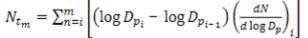

In [4]:
ultrafine = smps.loc[dict(diameter_mobility = slice(0,50))][['diameter_mobility_bounds', 'dN_dlogDp']]
ultrafine['diff'] = np.log10(ultrafine.diameter_mobility_bounds.load().loc[dict(bound=1)]) - np.log10(ultrafine.diameter_mobility_bounds.load().loc[dict(bound=0)])

In [5]:
aero_uf = ultrafine['diff'] * ultrafine['dN_dlogDp']
aero_uf = aero_uf.sum(dim='diameter_mobility')

In [6]:
ccn

<xarray.Dataset>
Dimensions:                            (time: 954599, size_bin: 20, bound: 2,
                                        n_lookup: 100)
Coordinates:
  * time                               (time) datetime64[ns] 2014-01-25T18:52...
  * size_bin                           (size_bin) float32 0.0 1.0 ... 18.0 19.0
Dimensions without coordinates: bound, n_lookup
Data variables: (12/42)
    base_time                          (time) datetime64[ns] 2014-01-25 ... 2...
    time_offset                        (time) datetime64[ns] dask.array<chunksize=(67,), meta=np.ndarray>
    size_bin_bounds                    (time, size_bin, bound) float32 dask.array<chunksize=(67, 20, 2), meta=np.ndarray>
    eta_lookup_table                   (time, n_lookup, bound) float32 dask.array<chunksize=(67, 100, 2), meta=np.ndarray>
    seconds_after_transition           (time) float64 dask.array<chunksize=(67,), meta=np.ndarray>
    supersaturation_set_point          (time) float32 dask.array<chunksize=(67,), meta=np.ndarray>
    ...                                 ...
    N_CCN                              (time) float32 dask.array<chunksize=(67,), meta=np.ndarray>
    qc_N_CCN                           (time) float64 dask.array<chunksize=(67,), meta=np.ndarray>
    N_CCN_dN                           (time, size_bin) float32 dask.array<chunksize=(67, 20), meta=np.ndarray>
    lat                                (time) float64 -3.213 -3.213 ... -3.213
    lon                                (time) float64 -60.6 -60.6 ... -60.6
    alt                                (time) float64 50.0 50.0 ... 50.0 50.0
Attributes: (12/20)
    command_line:             aosdilutioncorr -s mao -f M1 -b 20131211 -e 201...
    Conventions:              ARM-1.1
    process_version:          ingest-aosdilutioncorr-1.4-0.el6
    dod_version:              aosccn1col-b1-3.8
    site_id:                  mao
    facility_id:              M1
    ...                       ...
    Instrument:               CCN-100
    Instrument_Manufacturer:  Droplet Measurement Technologies
    AOS_DAC_type:             N
    serial_number:            N/A
    doi:                      10.5439/1227964
    history:                  created by user koontz on machine amber at 2015...

In [7]:
total_aerosol = smps.total_N_conc.load().resample(time="12Min").mean().rolling(time=4, center=True, min_periods=1).mean().dropna("time")
total_ccn = ccn.N_CCN.load().sortby("time")
total_ccn = total_ccn.sel(time=total_ccn.time.notnull()).resample(time="12Min").mean()
total_ccn = total_ccn.rolling(time=4, center=True, min_periods=1).mean().dropna("time")
uf_aerosol = aero_uf.load().resample(time="12Min").mean().rolling(time=4, center=True, min_periods=1).mean().dropna("time")

In [15]:
sys = pd.read_pickle("/home/camilacl/git/amazon-storms-aerosols/data/general/sysfilt_hstbwd_nearest_6h_25km.pickle")
sys.date = pd.to_datetime(sys.date)
sys["date_init"] = pd.to_datetime(sys.name_file, format="t%y%m%d_%H%M")
# df.inter = pd.to_timedelta(df.inter).dt.total_seconds()/60
# df.set_index(["date"], inplace=True)

In [16]:
temp = [total_aerosol.loc[total_aerosol.time == i].values for i in sys.date_init.values]
sys["totaerosol_1_cm3"] = [i.item() if i.shape[0] > 0 else np.nan for i in temp]
temp = [total_ccn.loc[total_ccn.time == i].values for i in sys.date_init.values]
sys["totccn_1_cm3"] = [i.item() if i.shape[0] > 0 else np.nan for i in temp]
temp = [uf_aerosol.loc[uf_aerosol.time == i].values for i in sys.date_init.values]
sys["ufaerosol_1_cm3"] = [i.item() if i.shape[0] > 0 else np.nan for i in temp]

## Adicionando sondagens

In [17]:
meteo_sonde = pd.read_pickle("/home/camilacl/git/amazon-storms-aerosols/data/general/meteo_from_sondewnpn.pickle")
meteo_sonde["date"] = meteo_sonde.date - np.timedelta64(4, 'h')
meteo_res = meteo_sonde.resample("12min", on="date").mean().rolling(15, min_periods=1).mean()
temp = [meteo_res.loc[meteo_res.index == i].values for i in sys.date_init.values]

In [18]:
sys_sub = sys.assign(cape_j_kg=[i.item(0) if i.shape[0] > 0 else np.nan for i in temp], 
           cin_j_kg=[i.item(1) if i.shape[0] > 0 else np.nan for i in temp],
           blrh_pc=[i.item(2) if i.shape[0] > 0 else np.nan for i in temp],
           lvws_m_s=[i.item(3) if i.shape[0] > 0 else np.nan for i in temp],
           wcd_km=[i.item(4) if i.shape[0] > 0 else np.nan for i in temp]).dropna(subset=["totaerosol_1_cm3", "ufaerosol_1_cm3", "cape_j_kg", "cin_j_kg", "blrh_pc", "lvws_m_s"])

<Axes: xlabel='date'>

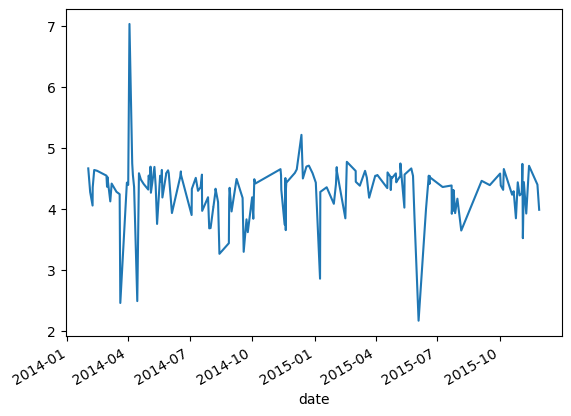

In [13]:
sys_sub.set_index('date').wcd_km.plot()

In [19]:
sys_sub["date_init"] = sys_sub.date_init + np.timedelta64(4, 'h')
sys_sub[["geom_name", "date_init", 'totaerosol_1_cm3', 'ufaerosol_1_cm3', 'totccn_1_cm3', 'cape_j_kg', 'cin_j_kg', 'blrh_pc', 'lvws_m_s', 'wcd_km']].set_index("geom_name").to_pickle(
    "/home/camilacl/git/amazon-storms-aerosols/data/general/sysfilt_hstbwd_nearest_6h_25km_aero_meteo.pickle"
)

In [ ]:
for index, row in sys_sub[["geom_name", 'totaerosol_1_cm3', 'totccn_1_cm3', 'cape_j_kg', 'cin_j_kg', 'blrh_pc', 'lvws_m_s']].set_index("geom_name").iterrows():
    print(index)
    print(row["cin_j_kg"])